<a href="https://colab.research.google.com/github/AvelaAI/Myprofile/blob/main/Bloemfontein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-4930b9b96688>:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


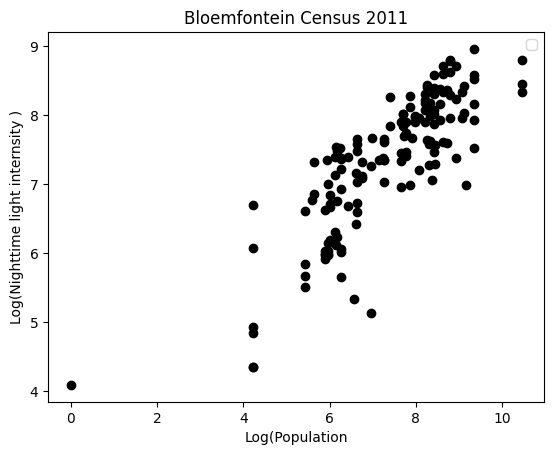

Correlation Coefficient (r): 0.8334605971714016
P-value for Correlation: 3.230184967803563e-40
Standard Deviation of Residuals: 0.5215078874369353
RMSE: 0.5215078874369352
R²: 0.7203489705883475


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter1d
from sklearn.pipeline import make_pipeline

# Your data
population_2011 = np.array([
    266, 11478, 763, 4491, 763, 384, 7578, 481, 3644, 6594, 5249, 377, 4075, 529, 5606,
    1067, 4644, 517, 4576, 8783, 2198, 1633, 2627, 34601, 458, 360, 67, 9605, 526, 2596,
    282, 2121, 2923, 11368, 280, 3177, 854, 2375, 2128, 717, 0, 1042, 407, 6129, 2263,
    1268, 1435, 521, 1393, 4313, 9076, 466, 2738, 4117, 3896, 615, 226, 226, 226, 226,
    11478, 11478, 11478, 763, 763, 7578, 7578, 5606, 5606, 5606, 2121, 2121, 854, 854,
    2375, 2375, 2375, 3644, 3644, 3644, 3644, 5249, 5249, 1435, 1435, 1435, 1435, 4491,
    4491, 4491, 4491, 4491, 736, 763, 763, 736, 384, 384, 384, 384, 481, 481, 4644, 1042,
    615, 8783, 2627, 2923, 2923, 2198, 2198, 6129, 6129, 1633, 9076, 3896, 3896, 4576,
    11368, 3177, 521, 4313, 466, 67, 67, 67, 67, 529, 529, 529, 67, 34601, 34601, 458,
    458, 360, 360, 360, 360, 4075, 4075, 4117, 4117, 407, 407, 407, 407, 6594, 6594,
    6594, 6594
])

ntl_2011 = np.array([
    63, 63, 63, 3, 3, 63, 63, 63, 52, 61, 63, 63, 63, 3, 63, 63, 63, 63, 3, 62,
    54, 5, 62, 3, 3, 63, 55, 63, 3, 6, 6, 63, 62, 3, 63, 3, 63, 63, 3, 63, 63, 63,
    62, 54, 6, 6, 63, 3, 6, 3, 5, 3, 63, 63, 5, 63, 63, 63, 62, 63, 63, 63, 63, 62,
    63, 63, 58, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 43, 51, 58, 52, 63, 63, 63,
    63, 63, 63, 6, 10, 44, 36, 13, 3, 13, 16, 59, 63, 63, 63, 63, 63, 63, 63, 63,
    62, 62, 62, 62, 62, 62, 50, 62, 45, 25, 24, 3, 30, 49, 63, 32, 37, 15, 42, 51,
    56, 58, 62, 51, 52, 22, 10, 56, 49, 28, 7, 63, 63, 63, 63, 60, 61, 63, 63, 63,
    62, 62, 63, 62, 57, 61, 60
])

# 1. Log Transformation
log_population = np.log(population_2011 + 1)
log_ntl = np.log(ntl_2011 + 1)

# 2. Smoothing with Gaussian Filter
smoothed_ntl = gaussian_filter1d(log_population, sigma=1)

# 3. Polynomial Regression (Degree 3)
polynomial_features = PolynomialFeatures(degree=3)
model = make_pipeline(polynomial_features, LinearRegression())

# Fit model to smoothed NTL and log-transformed population
model.fit(log_population.reshape(-1, 1), smoothed_ntl)

# Predict values
predicted_ntl = model.predict(log_population.reshape(-1, 1))

# 4. Correlation coefficient (Pearson's r)
corr, p_value_corr = pearsonr(log_population, smoothed_ntl)

# 5. Standard Deviation of Residuals
residuals = smoothed_ntl - predicted_ntl
std_dev_residuals = np.std(residuals)

# Visualize the results
plt.scatter(log_population, smoothed_ntl, color='black', )

# plt.plot(log_population, predicted_ntl, color='red', label='Polynomial Regression')
plt.title('Bloemfontein Census 2011')
plt.xlabel('Log(Population')
plt.ylabel('Log(Nighttime light internsity )')
plt.legend()
plt.show()

# Print Evaluation Metrics
print(f"Correlation Coefficient (r): {corr}")
print(f"P-value for Correlation: {p_value_corr}")
print(f"Standard Deviation of Residuals: {std_dev_residuals}")
print(f"RMSE: {np.sqrt(mean_squared_error(smoothed_ntl, predicted_ntl))}")
print(f"R²: {r2_score(smoothed_ntl, predicted_ntl)}")
